# Capitulo 16: Agrupando por series de tiempo.

##### Ejemplos

Generando series de tiempo de numeros aleatorios y luego los muestree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Quiero 7 dias de 24 horas con 60 minutos cada periodo = 7*24*60
periods = 7*24*60
tidx = pd.date_range('2016-07-01', periods=periods, freq='T')
# 2016-07-01 Es la fecha inicial
# T Es el código de frecuencia por minuto

np.random.seed([3,1415])
data = np.random.randn(periods)
ts = pd.Series(data=data, index=tidx, name='Hola series de tiempo')

ts.describe()

count    10080.000000
mean        -0.008853
std          0.995411
min         -3.936794
25%         -0.683442
50%          0.002640
75%          0.654986
max          3.906053
Name: Hola series de tiempo, dtype: float64

Tomemos estos 7 días de datos por minuto y reduzcamos la muestra a cada 15 minutos. Todos los códigos de frecuencia se pueden encontrar [aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

In [5]:
ts.resample('15T').last()

2016-07-01 00:00:00   -0.911575
2016-07-01 00:15:00    0.831452
2016-07-01 00:30:00    1.258253
2016-07-01 00:45:00   -0.017209
2016-07-01 01:00:00    0.025249
                         ...   
2016-07-07 22:45:00   -0.112963
2016-07-07 23:00:00   -1.684835
2016-07-07 23:15:00   -0.268678
2016-07-07 23:30:00    1.097568
2016-07-07 23:45:00   -0.543848
Freq: 15T, Name: Hola series de tiempo, Length: 672, dtype: float64

O cualquier otra cosa que podamos hacer con un objeto `groupby`, [documentación](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

Incluso podemos agregar varias cosas útiles. Tracemos el mínimo, **la media y el máximo** de estos datos de **remuestreo('15M').**

<Axes: >

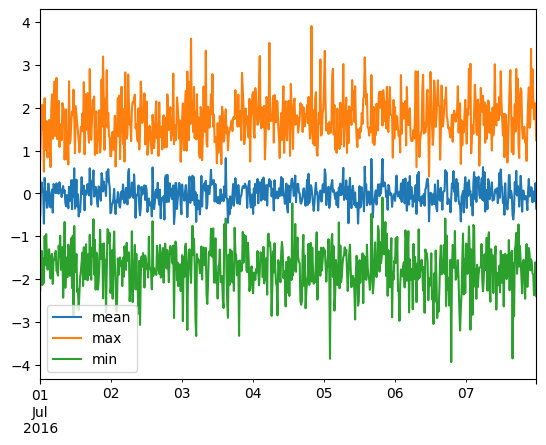

In [6]:
ts.resample('15T').agg(['mean', 'max', 'min']).plot()

Volvamos a muestrear más de `'15T'` (15 minutos), `'30T'` (media hora) y `'1H'` (1 hora) y veamos cómo nuestros datos se vuelven más fluidos.

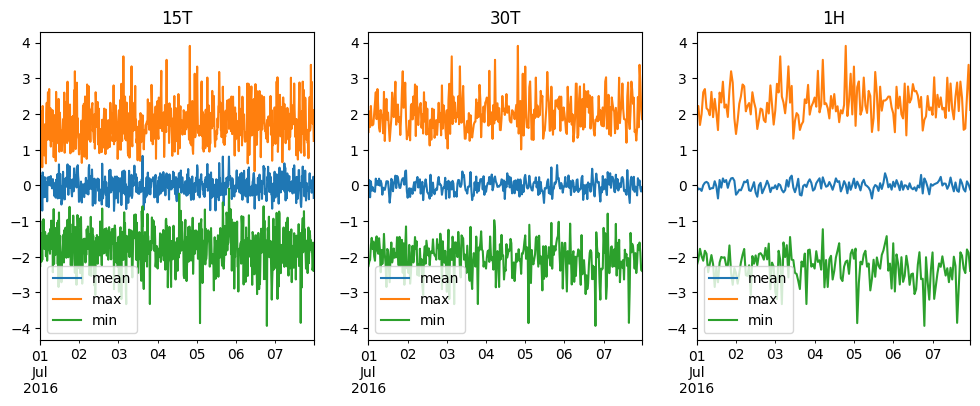

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, freq in enumerate(['15T', '30T', '1H']):
    ts.resample(freq).agg(['mean', 'max', 'min']).plot(ax=axes[i], title=freq)

Read Grouping Time Series Data [online:](https://riptutorial.com/pandas/topic/4747/grouping-time-series-data)